In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# ignore warnigns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
log_df = pd.read_csv('log2.csv')
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [3]:
log_df.head()
log_df.shape
log_df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [5]:
# 'reset_both' and ' drop' change to 'deny'
#log_df.loc[log_df['Action'] !='allow', 'Action'] = 'not allow'

In [6]:
log_df = log_df.drop_duplicates()
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57170 entries, 0 to 65530
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           57170 non-null  int64 
 1   Destination Port      57170 non-null  int64 
 2   NAT Source Port       57170 non-null  int64 
 3   NAT Destination Port  57170 non-null  int64 
 4   Action                57170 non-null  object
 5   Bytes                 57170 non-null  int64 
 6   Bytes Sent            57170 non-null  int64 
 7   Bytes Received        57170 non-null  int64 
 8   Packets               57170 non-null  int64 
 9   Elapsed Time (sec)    57170 non-null  int64 
 10  pkts_sent             57170 non-null  int64 
 11  pkts_received         57170 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 5.7+ MB


<AxesSubplot:xlabel='Action', ylabel='count'>

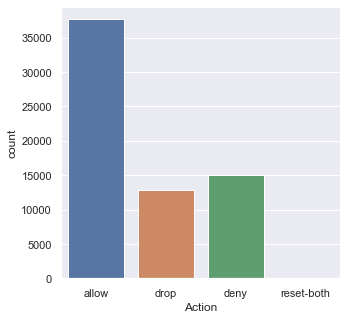

In [6]:
sns.set(rc={"figure.figsize": (5, 5)})
sns.countplot(log_df['Action'])

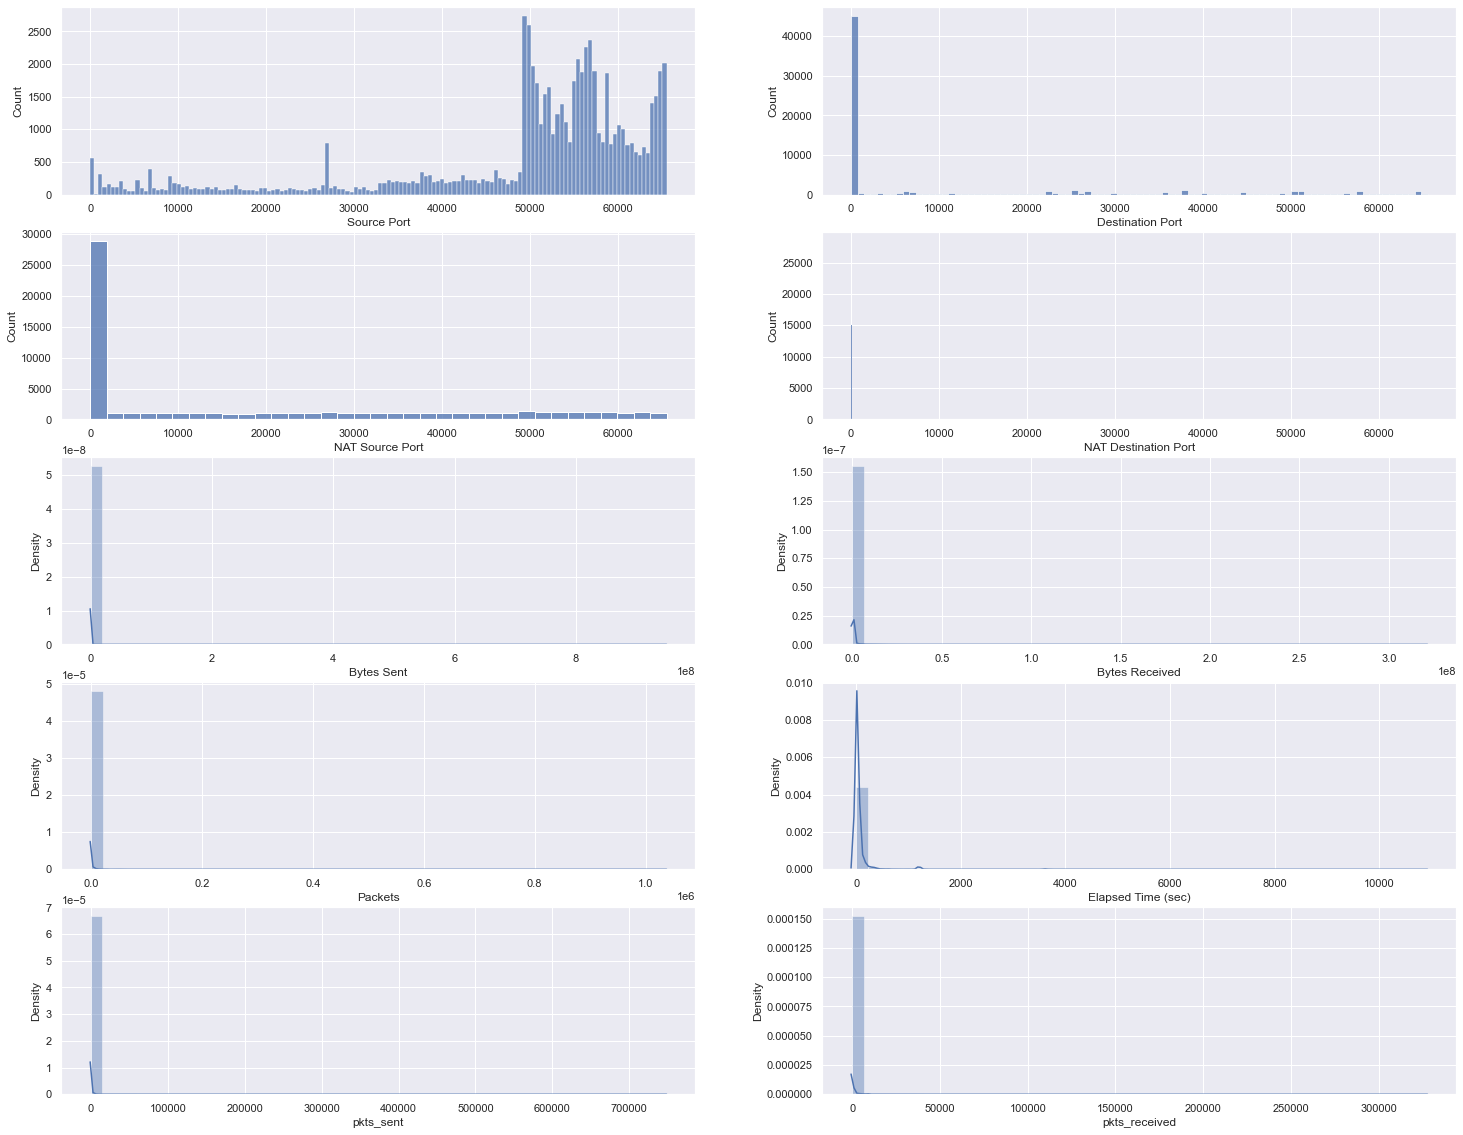

CPU times: user 10.8 s, sys: 126 ms, total: 10.9 s
Wall time: 6.31 s


In [7]:
%%time
# distribution of other variables
from pylab import *

sns.set(rc={"figure.figsize": (25, 20)})

subplot(5,2,1)
ax = sns.histplot(log_df['Source Port'])

subplot(5,2,2)
ax = sns.histplot(log_df['Destination Port'])

subplot(5,2,3)
ax = sns.histplot(log_df['NAT Source Port'])

subplot(5,2,4)
ax = sns.histplot(log_df['NAT Destination Port'])

subplot(5,2,5)
ax = sns.distplot(log_df['Bytes Sent'])

subplot(5,2,6)
ax = sns.distplot(log_df['Bytes Received'])

subplot(5,2,7)
ax = sns.distplot(log_df['Packets'])

subplot(5,2,8)
ax = sns.distplot(log_df['Elapsed Time (sec)'])

subplot(5,2,9)
ax = sns.distplot(log_df['pkts_sent'])

subplot(5,2,10)
ax = sns.distplot(log_df['pkts_received'])

plt.show()

CPU times: user 4.6 s, sys: 46.1 ms, total: 4.65 s
Wall time: 4.66 s


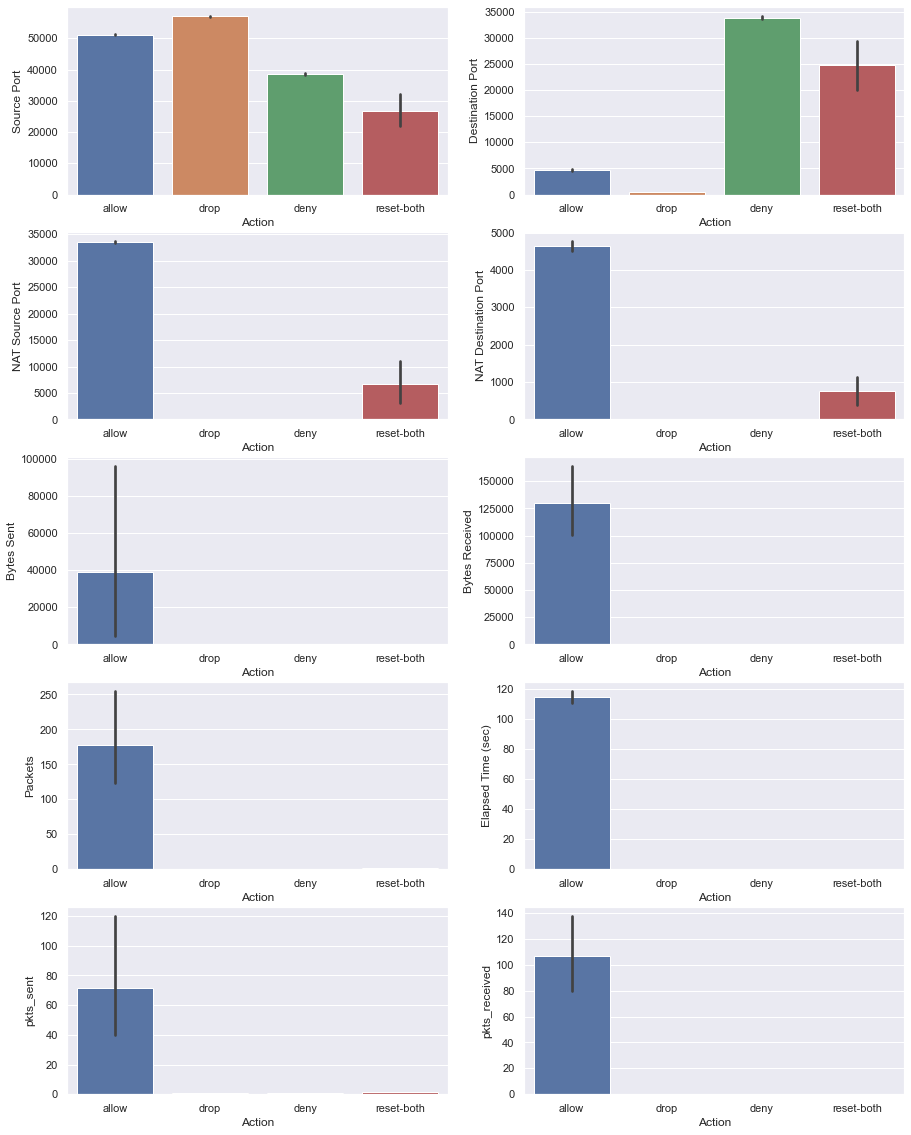

In [8]:
%%time
sns.set(rc={"figure.figsize": (15, 20)})

subplot(5,2,1)
ax = sns.barplot(x= log_df['Action'],  y= log_df['Source Port'])

subplot(5,2,2)
ax = sns.barplot(x= log_df['Action'],  y=log_df['Destination Port'])

subplot(5,2,3)
ax = sns.barplot(x= log_df['Action'],  y=log_df['NAT Source Port'])

subplot(5,2,4)
ax = sns.barplot(x= log_df['Action'],  y=log_df['NAT Destination Port'])

subplot(5,2,5)
ax = sns.barplot(x= log_df['Action'],  y=log_df['Bytes Sent'])

subplot(5,2,6)
ax = sns.barplot(x= log_df['Action'],  y=log_df['Bytes Received'])

subplot(5,2,7)
ax = sns.barplot(x= log_df['Action'],  y=log_df['Packets'])

subplot(5,2,8)
ax = sns.barplot(x= log_df['Action'],  y=log_df['Elapsed Time (sec)'])

subplot(5,2,9)
ax = sns.barplot(x= log_df['Action'],  y=log_df['pkts_sent'])

subplot(5,2,10)
ax = sns.barplot(x= log_df['Action'],  y=log_df['pkts_received'])


CPU times: user 678 ms, sys: 15.2 ms, total: 693 ms
Wall time: 695 ms


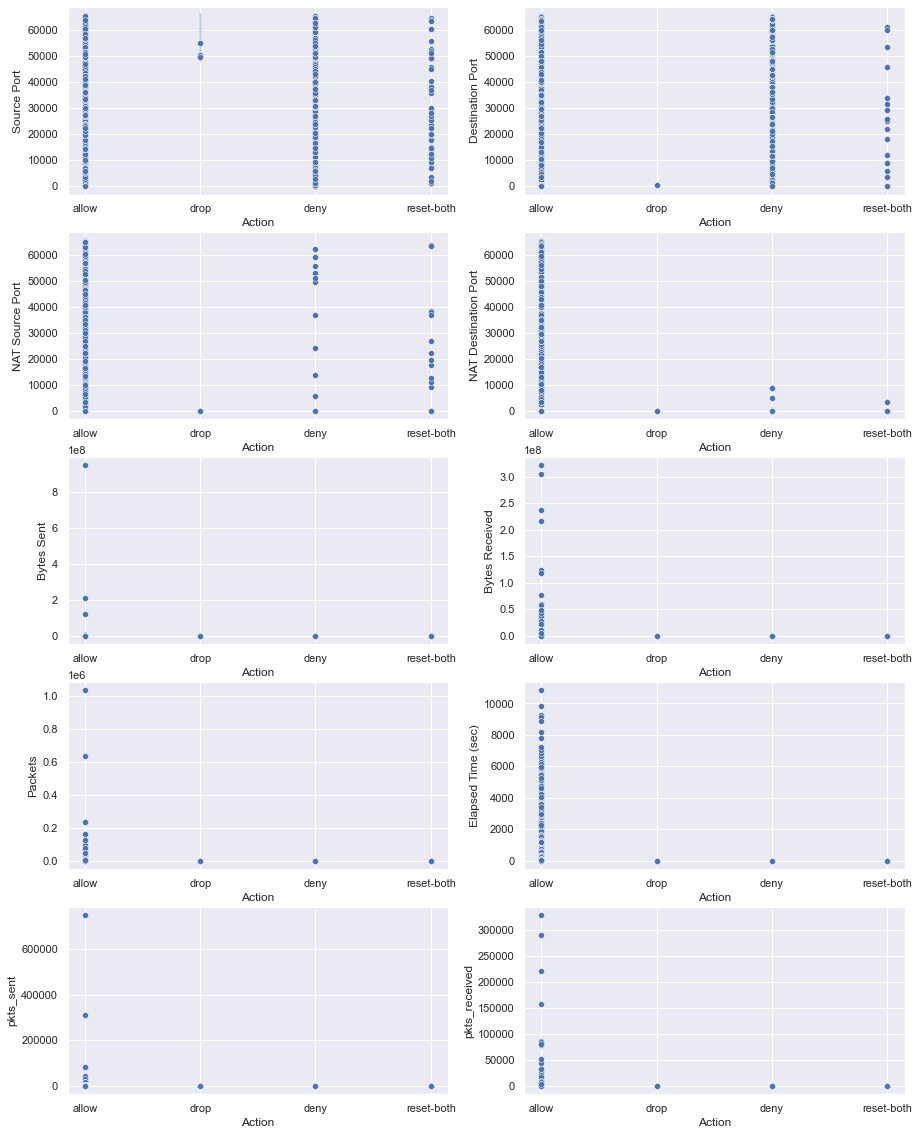

In [9]:
%%time
sns.set(rc={"figure.figsize": (15, 20)})

subplot(5,2,1)
ax = sns.scatterplot(x= log_df['Action'],  y= log_df['Source Port'])

subplot(5,2,2)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['Destination Port'])

subplot(5,2,3)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['NAT Source Port'])

subplot(5,2,4)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['NAT Destination Port'])

subplot(5,2,5)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['Bytes Sent'])

subplot(5,2,6)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['Bytes Received'])

subplot(5,2,7)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['Packets'])

subplot(5,2,8)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['Elapsed Time (sec)'])

subplot(5,2,9)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['pkts_sent'])

subplot(5,2,10)
ax = sns.scatterplot(x= log_df['Action'],  y=log_df['pkts_received'])

In [136]:
test = log_df[log_df['Action'] !='allow']
test['Source Port'].value_counts()

58638    790
443      267
3478     105
0         88
45941     77
        ... 
51216      1
10252      1
59396      1
51200      1
53118      1
Name: Source Port, Length: 13728, dtype: int64

In [137]:
log_df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [7]:
log_df = log_df[['Source Port','Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Action']]
log_df = log_df.drop_duplicates()
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53277 entries, 0 to 65530
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           53277 non-null  int64 
 1   Destination Port      53277 non-null  int64 
 2   NAT Source Port       53277 non-null  int64 
 3   NAT Destination Port  53277 non-null  int64 
 4   Action                53277 non-null  object
dtypes: int64(4), object(1)
memory usage: 2.4+ MB


In [6]:
categorical= log_df[['Source Port','Destination Port', 'NAT Source Port', 'NAT Destination Port']]
#dropping 'Bytes' - because its sum of sent and received bytes
#continuous = log_df.drop(['Bytes','Packets','Source Port','Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Action'], axis = 1)


print('Categorical features: ',list(categorical.columns)) # categorical features
#print('Continuous features: ',list(continuous.columns)) # continuous features

Categorical features:  ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']


<AxesSubplot:xlabel='Action', ylabel='count'>

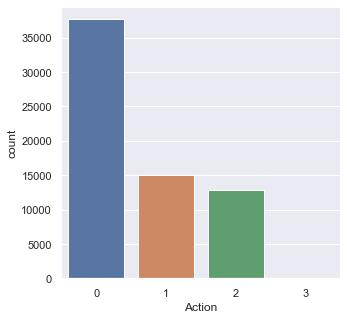

In [7]:
from sklearn import preprocessing

# transforming categorical variables
le = preprocessing.LabelEncoder()
log_df['Action'] = le.fit_transform(log_df['Action'])
log_df['Action'].unique()
sns.set(rc={"figure.figsize": (5, 5)})
sns.countplot(log_df['Action'])

In [8]:
list(categorical.columns)

['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

In [9]:
from sklearn.model_selection import train_test_split
x = categorical
y = log_df[['Action']]


<AxesSubplot:xlabel='Action', ylabel='count'>

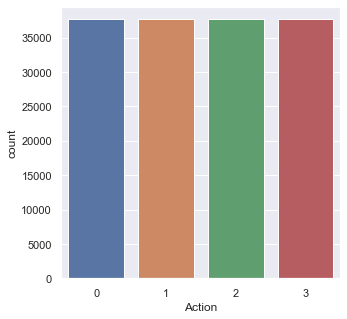

In [10]:
from imblearn.over_sampling import SMOTE, ADASYN
x_resampled, y_resampled = SMOTE().fit_resample(x, y)
sns.set(rc={"figure.figsize": (5, 5)})
sns.countplot(y_resampled['Action'])

In [11]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled,test_size=0.33,
                                                   random_state = 123)

In [172]:
%%time
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

cat_features = list(categorical.columns)
num_features = list(continuous.columns)

#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse = True))])

#Append to preprocessing step
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, num_features),
#        ('cat', categorical_transformer, cat_features)])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features)])

preprocessor.fit(x_resampled)

# transform train and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

CPU times: user 580 ms, sys: 27.8 ms, total: 607 ms
Wall time: 183 ms


In [173]:
%%time
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_transformed, y_train)
svm_scores = svm.score(X_test_transformed, y_test)
y_pred_svm = svm.predict(X_test_transformed)
print('Score for SVM {}'.format(svm_scores))

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score for SVM 0.9609137566670021
CPU times: user 3min 35s, sys: 2.23 s, total: 3min 37s
Wall time: 3min 36s


In [174]:
%%time
# KNC
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_transformed, y_train)
knc_scores = knc.score(X_test_transformed, y_test)
y_pred_knc = knc.predict(X_test_transformed)
print('Score for KNeighborsClassifier {}'.format(knc_scores))

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Score for KNeighborsClassifier 0.8689946663983094
CPU times: user 1min 21s, sys: 28 s, total: 1min 49s
Wall time: 1min 48s


In [193]:
%%time
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_test_transformed, y_test)
y_pred_rfc = rfc.predict(X_test_transformed)
rfc_scores = rfc.score(X_test_transformed, y_test)
print('Score for RandomForestClassifier {}'.format(rfc_scores))

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Score for RandomForestClassifier 0.9991949280466942
CPU times: user 5min 16s, sys: 3.5 s, total: 5min 20s
Wall time: 5min 28s


In [209]:
%%time
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#SVM
# calculate recall (Recall = TruePositives / (TruePositives + FalseNegatives))
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
print('Recall SVM: %.3f' % recall_svm)

# calculate precision (Precision = TruePositives / (TruePositives + FalsePositives))
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
print('Precision SVM: %.3f' % precision_svm)

f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print('F1 score SVM: %.3f' % f1_svm)

#KNN
# calculate recall (Recall = TruePositives / (TruePositives + FalseNegatives))
recall_knc = recall_score(y_test, y_pred_knc, average='macro')
print('Recall KNeighborsClassifier: %.3f' % recall_knc)

# calculate precision (Precision = TruePositives / (TruePositives + FalsePositives))
precision_knc = precision_score(y_test, y_pred_knc, average='macro')
print('Precision KNeighborsClassifier: %.3f' % precision_knc)

f1_knc = f1_score(y_test, y_pred_knc, average='macro')
print('F1 score KNeighborsClassifier: %.3f' % f1_knc)

#RandomForest
# calculate recall (Recall = TruePositives / (TruePositives + FalseNegatives))
recall_rfc = recall_score(y_test, y_pred_rfc, average='macro')
print('Recall RandomForestClassifier: %.3f' % recall_rfc)

# calculate precision (Precision = TruePositives / (TruePositives + FalsePositives))
precision_rfc = precision_score(y_test, y_pred_rfc, average='macro')
print('Precision RandomForestClassifier: %.3f' % precision_rfc)

f1_rfc = f1_score(y_test, y_pred_rfc, average='macro')
print('F1 score RandomForestClassifier: %.3f' % f1_rfc)

Recall SVM: 0.961
Precision SVM: 0.962
F1 score SVM: 0.961
Recall KNeighborsClassifier: 0.868
Precision KNeighborsClassifier: 0.889
F1 score KNeighborsClassifier: 0.862
Recall RandomForestClassifier: 0.999
Precision RandomForestClassifier: 0.999
F1 score RandomForestClassifier: 0.999
CPU times: user 135 ms, sys: 2.58 ms, total: 138 ms
Wall time: 136 ms


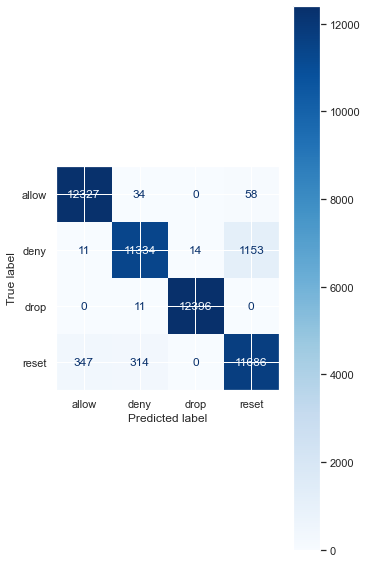

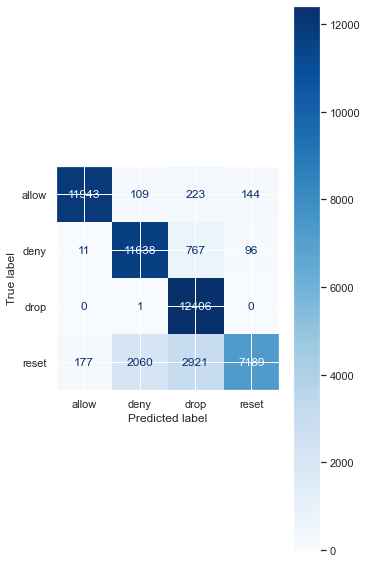

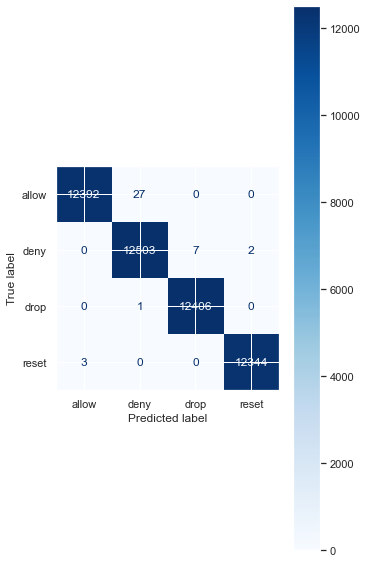

CPU times: user 2min 9s, sys: 33 s, total: 2min 42s
Wall time: 2min 49s


In [217]:
%%time
from sklearn.metrics import plot_confusion_matrix
labels = ['allow', 'deny', 'drop', 'reset']
plot_confusion_matrix(svm, X_test_transformed, y_test, cmap = 'Blues', display_labels = labels)
plot_confusion_matrix(knc, X_test_transformed, y_test, cmap = 'Blues', display_labels = labels)
plot_confusion_matrix(rfc, X_test_transformed, y_test, cmap = 'Blues', display_labels = labels)
plt.show() 


In [185]:
import numpy as np


def plot_cm(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

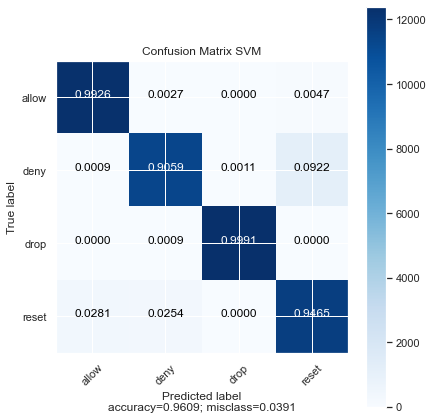

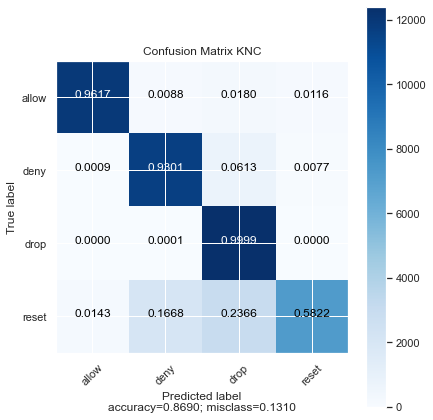

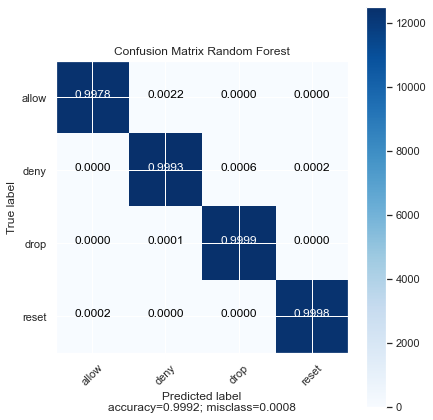

In [211]:
# SVM and KNC, RF
%% time
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knc = confusion_matrix(y_test, y_pred_knc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
labels = ['allow', 'deny', 'drop', 'reset']
plot_cm(cm_svm, labels, title = 'Confusion Matrix SVM')
plot_cm(cm_knc, labels, title = 'Confusion Matrix KNC')
plot_cm(cm_rfc, labels, title = 'Confusion Matrix Random Forest')

### without SMOTE

In [218]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33,
                                                   random_state = 123)

In [219]:
%%time
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

cat_features = list(categorical.columns)
num_features = list(continuous.columns)

#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse = True))])

#Append to preprocessing step
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, num_features),
#        ('cat', categorical_transformer, cat_features)])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features)])

preprocessor.fit(x)

# transform train and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

CPU times: user 83.9 ms, sys: 37 ms, total: 121 ms
Wall time: 150 ms


In [220]:
%%time
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_transformed, y_train)
svm_scores = svm.score(X_test_transformed, y_test)
y_pred_svm = svm.predict(X_test_transformed)
print('Score for SVM {}'.format(svm_scores))

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score for SVM 0.9964857116433922
CPU times: user 25.8 s, sys: 759 ms, total: 26.6 s
Wall time: 26.7 s


In [221]:
%%time
# KNC
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_transformed, y_train)
knc_scores = knc.score(X_test_transformed, y_test)
y_pred_knc = knc.predict(X_test_transformed)
print('Score for KNeighborsClassifier {}'.format(knc_scores))

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Score for KNeighborsClassifier 0.9877462313881439
CPU times: user 33.9 s, sys: 10.4 s, total: 44.3 s
Wall time: 44.5 s


In [222]:
%%time
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_test_transformed, y_test)
y_pred_rfc = rfc.predict(X_test_transformed)
rfc_scores = rfc.score(X_test_transformed, y_test)
print('Score for RandomForestClassifier {}'.format(rfc_scores))

/Users/dalyapraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Score for RandomForestClassifier 0.9979654120040692
CPU times: user 5.39 s, sys: 34.5 ms, total: 5.42 s
Wall time: 5.45 s


In [223]:
%%time
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#SVM
# calculate recall (Recall = TruePositives / (TruePositives + FalseNegatives))
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
print('Recall SVM: %.3f' % recall_svm)

# calculate precision (Precision = TruePositives / (TruePositives + FalsePositives))
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
print('Precision SVM: %.3f' % precision_svm)

f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print('F1 score SVM: %.3f' % f1_svm)

#KNN
# calculate recall (Recall = TruePositives / (TruePositives + FalseNegatives))
recall_knc = recall_score(y_test, y_pred_knc, average='macro')
print('Recall KNeighborsClassifier: %.3f' % recall_knc)

# calculate precision (Precision = TruePositives / (TruePositives + FalsePositives))
precision_knc = precision_score(y_test, y_pred_knc, average='macro')
print('Precision KNeighborsClassifier: %.3f' % precision_knc)

f1_knc = f1_score(y_test, y_pred_knc, average='macro')
print('F1 score KNeighborsClassifier: %.3f' % f1_knc)

#RandomForest
# calculate recall (Recall = TruePositives / (TruePositives + FalseNegatives))
recall_rfc = recall_score(y_test, y_pred_rfc, average='macro')
print('Recall RandomForestClassifier: %.3f' % recall_rfc)

# calculate precision (Precision = TruePositives / (TruePositives + FalsePositives))
precision_rfc = precision_score(y_test, y_pred_rfc, average='macro')
print('Precision RandomForestClassifier: %.3f' % precision_rfc)

f1_rfc = f1_score(y_test, y_pred_rfc, average='macro')
print('F1 score RandomForestClassifier: %.3f' % f1_rfc)

Recall SVM: 0.873
Precision SVM: 0.913
F1 score SVM: 0.890
Recall KNeighborsClassifier: 0.867
Precision KNeighborsClassifier: 0.936
F1 score KNeighborsClassifier: 0.893
Recall RandomForestClassifier: 0.951
Precision RandomForestClassifier: 0.999
F1 score RandomForestClassifier: 0.973
CPU times: user 63.1 ms, sys: 4.71 ms, total: 67.9 ms
Wall time: 72 ms


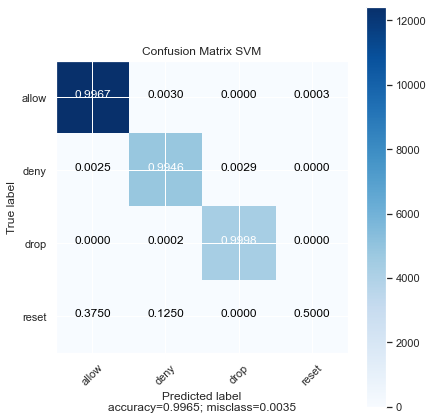

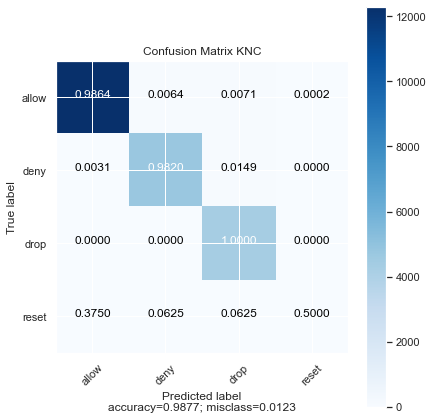

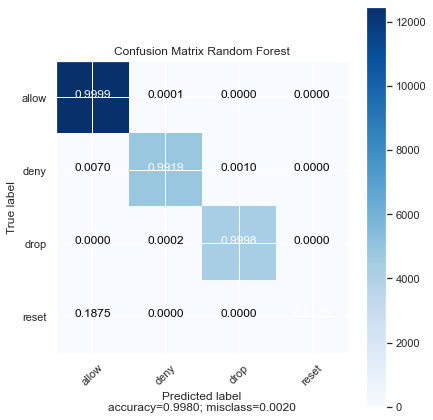

In [228]:
# SVM and KNC, RF
#%%time
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knc = confusion_matrix(y_test, y_pred_knc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
labels = ['allow', 'deny', 'drop', 'reset']
plot_cm(cm_svm, labels, title = 'Confusion Matrix SVM')
plot_cm(cm_knc, labels, title = 'Confusion Matrix KNC')
plot_cm(cm_rfc, labels, title = 'Confusion Matrix Random Forest')

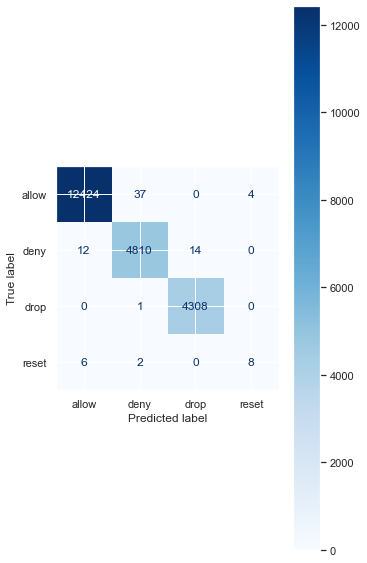

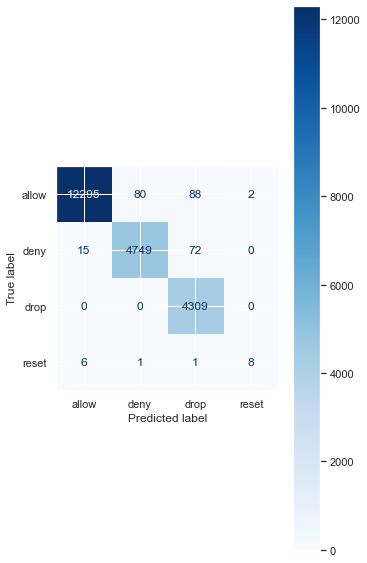

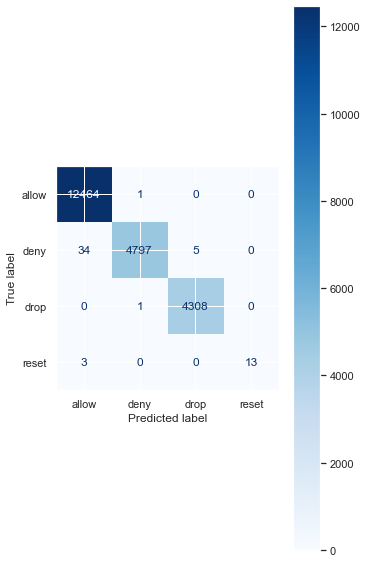

CPU times: user 21 s, sys: 4.81 s, total: 25.8 s
Wall time: 25.9 s


In [229]:
%%time
from sklearn.metrics import plot_confusion_matrix
labels = ['allow', 'deny', 'drop', 'reset']
plot_confusion_matrix(svm, X_test_transformed, y_test, cmap = 'Blues', display_labels = labels)
plot_confusion_matrix(knc, X_test_transformed, y_test, cmap = 'Blues', display_labels = labels)
plot_confusion_matrix(rfc, X_test_transformed, y_test, cmap = 'Blues', display_labels = labels)
plt.show() 